# Business Understanding

## Latar Belakang

Kartu kredit merupakan salah satu produk keuangan yang banyak digunakan oleh masyarakat. Untuk meminimalisir risiko gagal bayar, industri keuangan menggunakan credit score card sebagai metode pengendalian risiko. Credit score card memanfaatkan data dan informasi pribadi yang diajukan oleh calon pemegang kartu kredit untuk memprediksi kemungkinan terjadinya gagal bayar di masa depan. Dengan demikian, bank dapat mengambil keputusan apakah akan menerbitkan kartu kredit kepada pemohon atau tidak. Skor kredit ini mampu mengkuantifikasi tingkat risiko secara objektif.

## Tujuan Bisnis

Tujuan dari proyek ini adalah membangun model machine learning yang dapat memprediksi apakah seorang pemohon kartu kredit termasuk kategori 'good' atau 'bad' client. Berbeda dengan tugas-tugas lain, definisi 'good' atau 'bad' client tidak diberikan secara eksplisit, sehingga perlu dilakukan konstruksi label menggunakan teknik tertentu seperti vintage analysis. Selain itu, masalah data yang tidak seimbang (unbalanced data) juga menjadi tantangan utama dalam tugas ini.

## Dampak Bisnis
Dengan adanya model prediksi yang akurat dan transparan, bank dapat:
- Mengurangi risiko gagal bayar.
- Mengoptimalkan proses pemberian kredit.
- Memberikan alasan yang jelas kepada nasabah dan regulator terkait keputusan kredit.
- Meningkatkan kepercayaan dan kepuasan nasabah.


## Project Domain

Proyek ini berada dalam domain keuangan, khususnya pada pengelolaan risiko kredit. Fokusnya adalah pada pengembangan model prediksi untuk credit scoring, yang digunakan oleh lembaga keuangan untuk menilai kelayakan kredit calon nasabah. Dengan memanfaatkan data historis dan algoritma machine learning, proyek ini bertujuan untuk meningkatkan akurasi prediksi risiko gagal bayar, sekaligus memastikan transparansi dalam pengambilan keputusan kredit.

## Problem Statements

Umumnya, credit score card dibangun berdasarkan data historis. Namun, ketika terjadi fluktuasi ekonomi yang besar, model yang dibangun dari data masa lalu bisa kehilangan kemampuan prediksinya. Model logistik (logistic regression) sering digunakan untuk credit scoring karena cocok untuk tugas klasifikasi biner dan dapat menghitung koefisien dari setiap fitur. Namun, seiring perkembangan teknologi, algoritma machine learning seperti Boosting, Random Forest, dan Support Vector Machines mulai digunakan untuk meningkatkan akurasi prediksi. Meskipun demikian, metode-metode ini sering kali kurang transparan dan sulit memberikan alasan penolakan atau penerimaan kepada nasabah maupun regulator.

## Goals

1. Membangun model machine learning yang dapat memprediksi apakah seorang pemohon kartu kredit termasuk kategori 'good' atau 'bad' client.
2. Mengatasi tantangan data yang tidak seimbang (unbalanced data) untuk memastikan model memiliki performa yang baik pada kedua kategori.
3. Memastikan model yang dibangun memiliki tingkat akurasi yang tinggi sekaligus transparan dalam pengambilan keputusan.
4. Memberikan insight yang dapat digunakan oleh bank untuk mengurangi risiko gagal bayar dan meningkatkan efisiensi proses pemberian kredit.

## Solution Statements

1. Mengumpulkan dan memahami data historis yang relevan untuk membangun model prediksi credit scoring.
2. Melakukan eksplorasi data untuk mengidentifikasi pola, outlier, dan distribusi data, serta menangani data yang tidak seimbang (unbalanced data).
3. Menggunakan algoritma machine learning seperti Logistic Regression, Random Forest, dan Boosting untuk membangun model prediksi.
4. Melakukan evaluasi model menggunakan metrik yang sesuai seperti akurasi, precision, recall, dan F1-score untuk memastikan performa model.
5. Memastikan transparansi model dengan menggunakan teknik interpretasi model seperti SHAP (SHapley Additive exPlanations) atau LIME (Local Interpretable Model-agnostic Explanations).
6. Memberikan rekomendasi berbasis data kepada bank untuk mengurangi risiko gagal bayar dan meningkatkan efisiensi proses pemberian kredit.

# Data Understanding

Pada tahap ini, kita akan memahami struktur data yang akan digunakan untuk membangun model prediksi. Langkah-langkah yang akan dilakukan meliputi:
1. Melihat sekilas data (head, info, dan deskripsi statistik).
2. Memeriksa distribusi data dan nilai yang hilang.
3. Mengidentifikasi fitur-fitur yang relevan untuk analisis lebih lanjut.

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielrizaldy","key":"024e2f28677ca9daf6169ee679913f26"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction --force

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 272MB/s]


In [4]:
!mkdir credit-card-approval-prediction
!unzip credit-card-approval-prediction.zip -d credit-card-approval-prediction
!ls credit-card-approval-prediction

Archive:  credit-card-approval-prediction.zip
  inflating: credit-card-approval-prediction/application_record.csv  
  inflating: credit-card-approval-prediction/credit_record.csv  
application_record.csv	credit_record.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.impute import SimpleImputer
import joblib
import os

In [6]:
# Define the directory where the data is unzipped
data_dir = 'credit-card-approval-prediction'

# Construct the file paths using os.path.join
app_file_path = os.path.join(data_dir, 'application_record.csv')
credit_file_path = os.path.join(data_dir, 'credit_record.csv')

# Load the data
app_df = pd.read_csv(app_file_path)
credit_df = pd.read_csv(credit_file_path)

## Exploratory Data Analysis

In [7]:
# Load datasets
app_df = pd.read_csv('credit-card-approval-prediction/application_record.csv')
credit_df = pd.read_csv('credit-card-approval-prediction/credit_record.csv')

In [8]:
# Using a left merge on app_df to keep all application records, even if no credit history
data = pd.merge(app_df, credit_df, on='ID', how='left')

In [9]:
# Exploratory Data Analysis (EDA)
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 

In [ ]:
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

In [ ]:
print("\nDataset Shape:", data.shape)

In [ ]:
print("\nDescriptive Statistics:")
print(data.describe(include='all'))

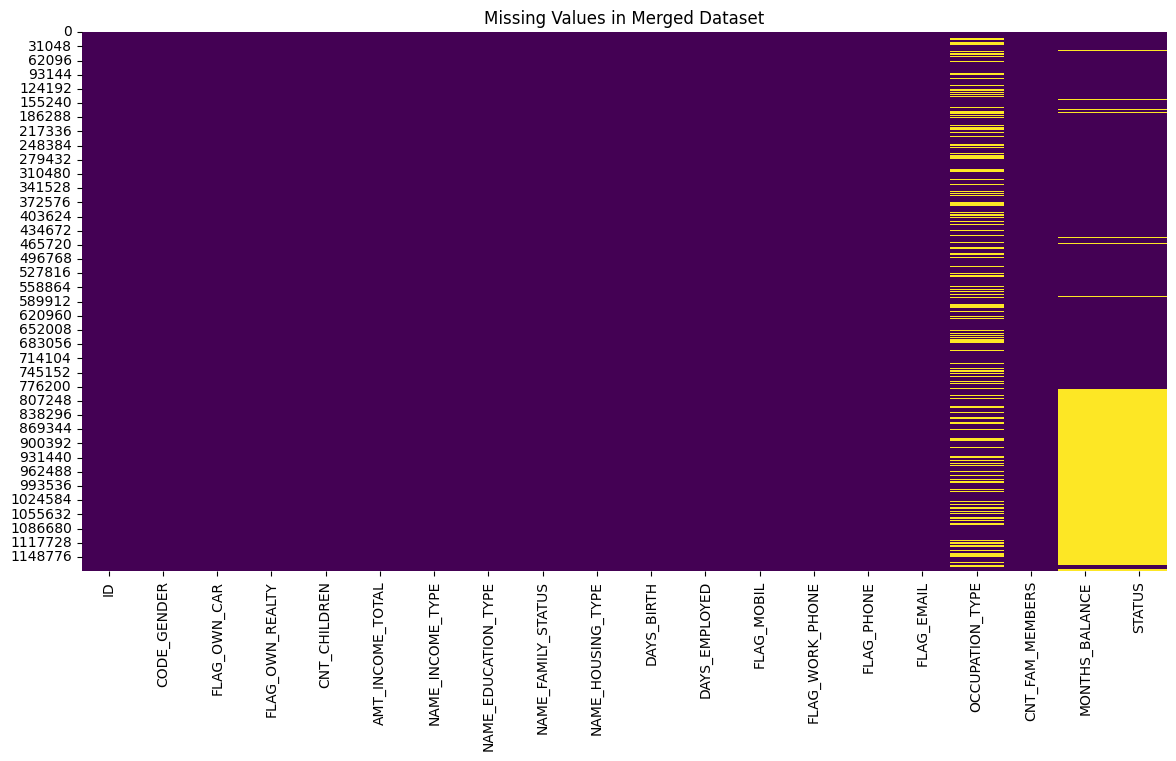

In [10]:
# Visualize missing values (focusing on columns with significant missing data)
plt.figure(figsize=(14, 7))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Merged Dataset')
plt.show()

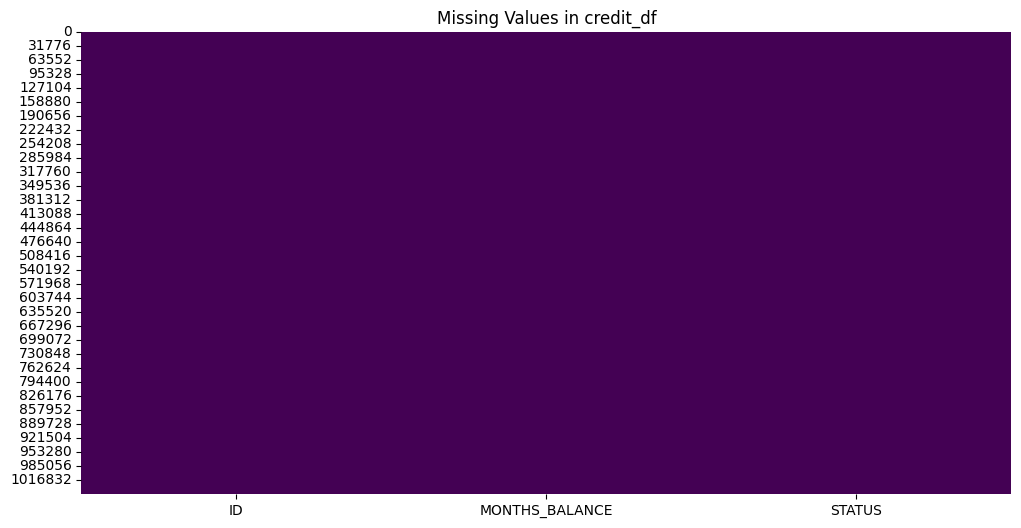

In [11]:
# Visualize missing values in credit_df
plt.figure(figsize=(12, 6))
sns.heatmap(credit_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in credit_df')
plt.show()

In [12]:
# Consider columns with high missing values
missing_percentage = data.isnull().sum() / len(data) * 100
high_missing_cols = missing_percentage[missing_percentage > 20].index.tolist() # Adjust threshold as needed
print(f"\nColumns with more than 20% missing values: {high_missing_cols}")


Columns with more than 20% missing values: ['OCCUPATION_TYPE', 'MONTHS_BALANCE', 'STATUS']



Distribution of Credit Status (STATUS) in credit_df:


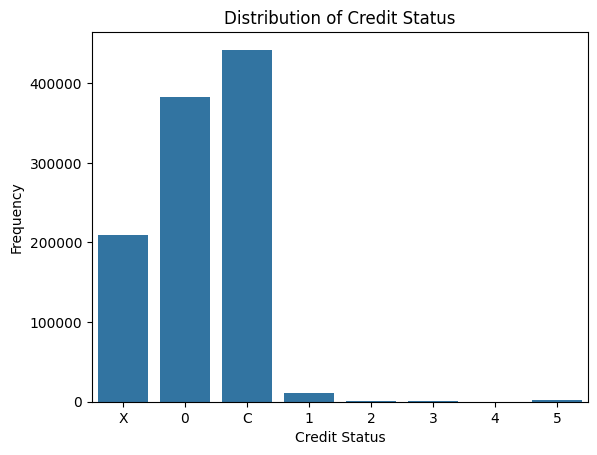

In [13]:
# Distribution of target variable (STATUS) before creating the binary target
print("\nDistribution of Credit Status (STATUS) in credit_df:")
if 'STATUS' in credit_df.columns:
    sns.countplot(x='STATUS', data=credit_df)
    plt.title('Distribution of Credit Status')
    plt.xlabel('Credit Status')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'STATUS' column not found in credit_df for distribution plot.")

/tmp/ipython-input-14-2218921296.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True) # Replace with NaN for imputation later


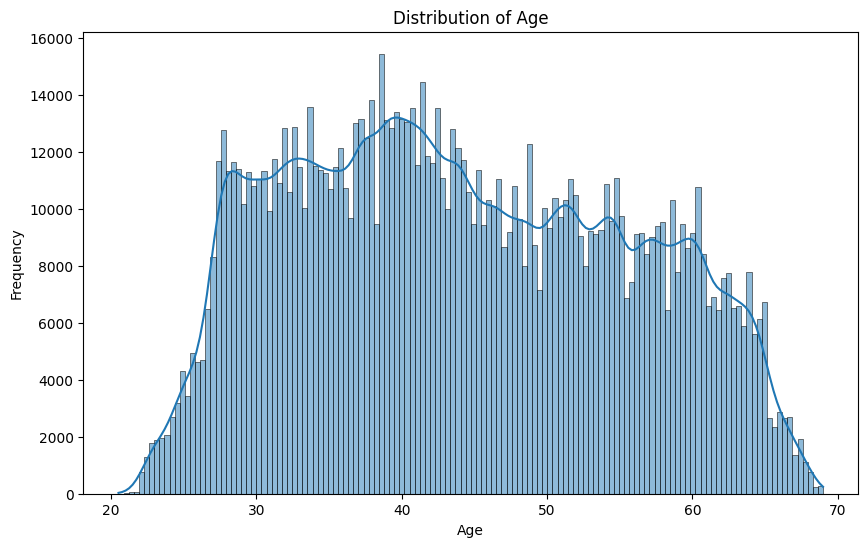

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
# Check if 'DAYS_BIRTH' is in the DataFrame and convert to age
if 'DAYS_BIRTH' in data.columns:
    # Handle potentially large positive values in DAYS_EMPLOYED (unemployed)
    data['DAYS_EMPLOYED_ANOM'] = data['DAYS_EMPLOYED'] == 365243
    data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True) # Replace with NaN for imputation later
    data['age'] = -data['DAYS_BIRTH'] / 365.25  # Convert days to years
    sns.histplot(data['age'], kde=True)
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'DAYS_BIRTH' not found for age calculation.")

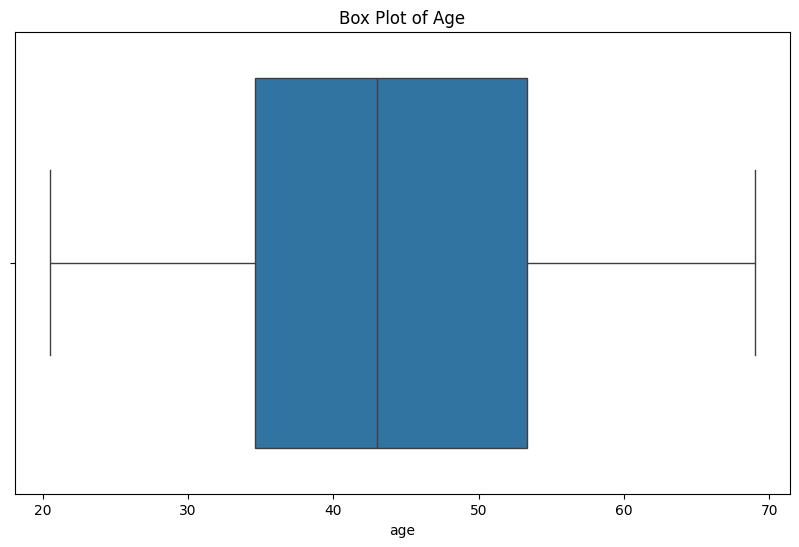

In [15]:
# Boxplot of Age
plt.figure(figsize=(10, 6))
# Check if 'age' is in data before creating the boxplot
if 'age' in data.columns:
    sns.boxplot(x=data['age'])
    plt.title('Box Plot of Age')
    plt.show()
else:
    print("Column 'age' not found for box plot.")


Analysis of AMT_INCOME_TOTAL:
count    1.179815e+06
mean     1.882163e+05
std      1.048445e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


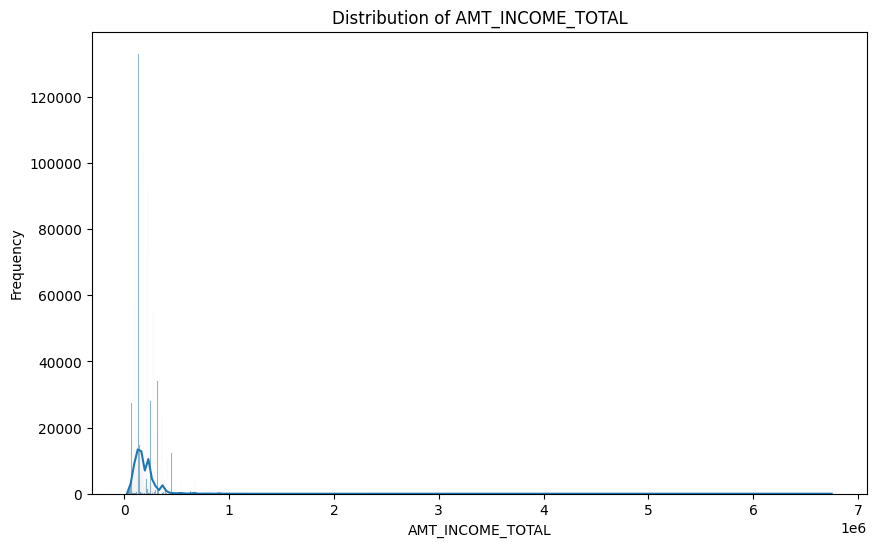

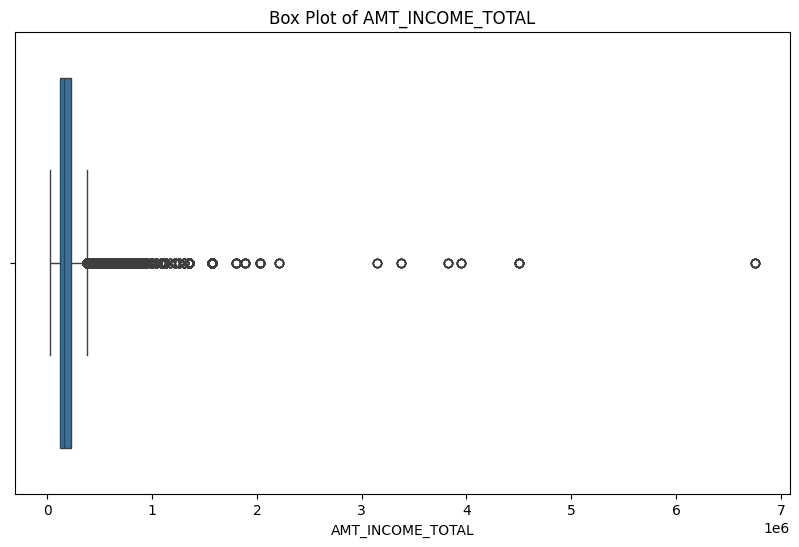

In [16]:
# Analysis of AMT_INCOME_TOTAL
print("\nAnalysis of AMT_INCOME_TOTAL:")
print(data['AMT_INCOME_TOTAL'].describe())

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AMT_INCOME_TOTAL'])
plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.show()


Analysis of NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 607449
Commercial associate    275652
Pensioner               197733
State servant            98638
Student                    343
Name: count, dtype: int64


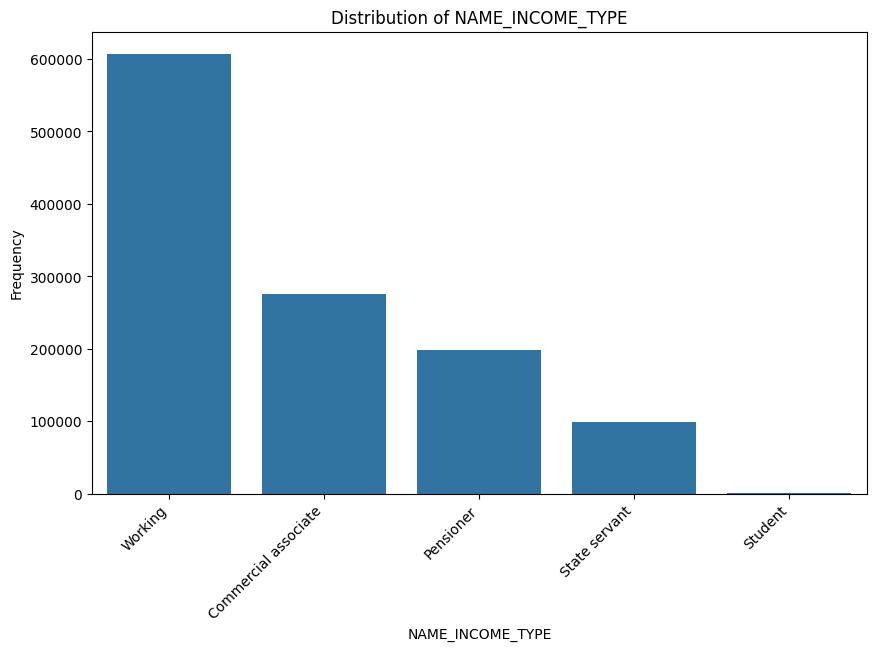

In [17]:
# Analysis of NAME_INCOME_TYPE
print("\nAnalysis of NAME_INCOME_TYPE:")
print(data['NAME_INCOME_TYPE'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_INCOME_TYPE', data=data)
plt.title('Distribution of NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

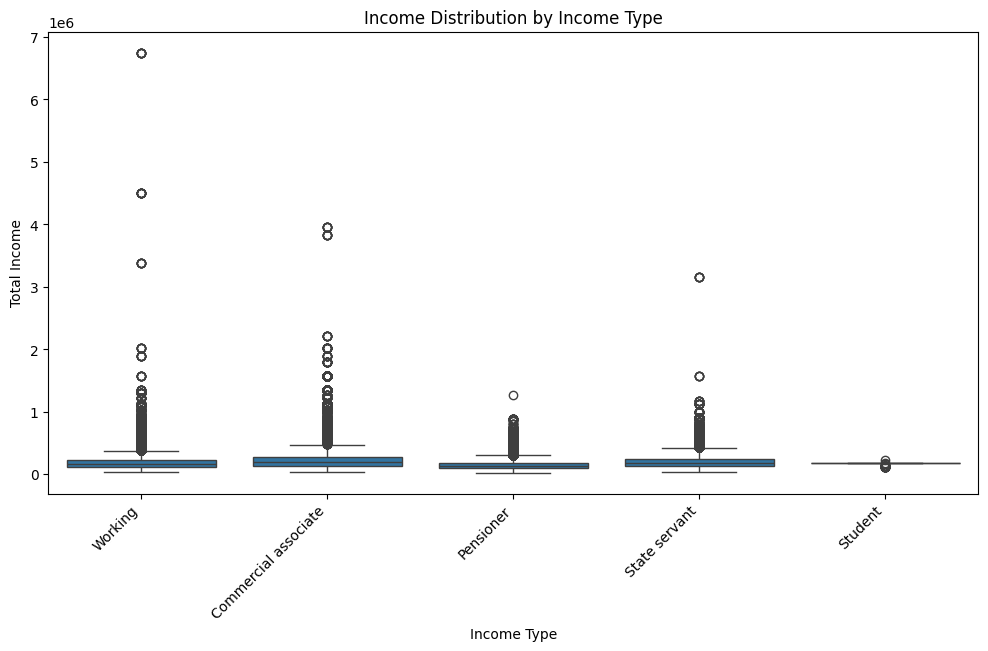

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=data)
plt.title('Income Distribution by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Total Income')
plt.xticks(rotation=45, ha='right')
plt.show()


Analysis of MONTHS_BALANCE:
Min Months Balance: -60.0
Max Months Balance: 0.0


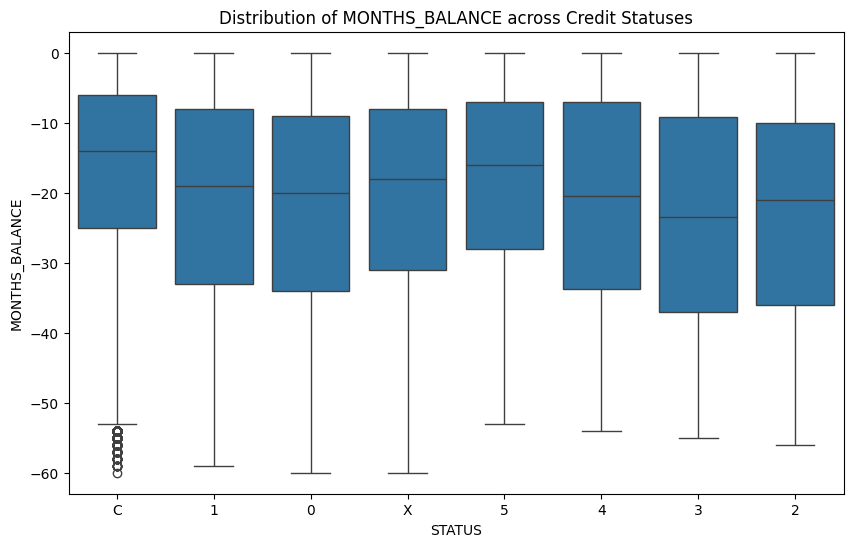

In [19]:
# Analysis of MONTHS_BALANCE
print("\nAnalysis of MONTHS_BALANCE:")
if 'MONTHS_BALANCE' in data.columns:
    print("Min Months Balance:", data['MONTHS_BALANCE'].min())
    print("Max Months Balance:", data['MONTHS_BALANCE'].max())

    plt.figure(figsize=(10, 6))
    # Check if STATUS column exists before plotting
    if 'STATUS' in data.columns:
        sns.boxplot(x='STATUS', y='MONTHS_BALANCE', data=data)
        plt.title('Distribution of MONTHS_BALANCE across Credit Statuses')
        plt.show()
    else:
        print("'STATUS' column not found for MONTHS_BALANCE box plot.")
else:
    print("'MONTHS_BALANCE' column not found.")

# Data Preparation

In [20]:
# Define 'bad' clients based on STATUS values
bad_status = ['1', '2', '3', '4', '5']
data['target'] = data['STATUS'].apply(lambda x: 1 if x in bad_status else 0)

In [21]:
# Handle NaN values in STATUS column before creating target (they will be treated as 'good')
data['target'] = data['target'].fillna(0)

In [22]:
# Drop the original STATUS column as the target is created
data = data.drop('STATUS', axis=1)

In [23]:
# Drop ID before splitting
data = data.drop('ID', axis=1)

In [24]:
# Split data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']

# Stratify split to maintain the proportion of target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)
print("\nDistribution of target in training set before resampling:")
print(y_train.value_counts(normalize=True))


Shape of training data: (943852, 20)
Shape of testing data: (235963, 20)

Distribution of target in training set:
target
0    0.990189
1    0.009811
Name: proportion, dtype: float64

Distribution of target in testing set:
target
0    0.990189
1    0.009811
Name: proportion, dtype: float64


In [25]:
# Handle missing values using imputation on split data
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Impute numerical columns
imputer_numerical = SimpleImputer(strategy='median')
X_train[numerical_cols] = imputer_numerical.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer_numerical.transform(X_test[numerical_cols])

# Impute categorical columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = imputer_categorical.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = imputer_categorical.transform(X_test[categorical_cols])

print("\nMissing values after imputation in X_train:")
print(X_train.isnull().sum().sum())
print("\nMissing values after imputation in X_test:")
print(X_test.isnull().sum().sum())


Missing values after imputation in X_train:
0

Missing values after imputation in X_test:
0


In [26]:
# Handle potential NaN values in MONTHS_BALANCE after imputation
X_train['credit_history_length'] = X_train['MONTHS_BALANCE'].apply(lambda x: abs(x) if pd.notna(x) else 0)
X_test['credit_history_length'] = X_test['MONTHS_BALANCE'].apply(lambda x: abs(x) if pd.notna(x) else 0)

In [27]:
# Drop original MONTHS_BALANCE column
X_train = X_train.drop('MONTHS_BALANCE', axis=1)
X_test = X_test.drop('MONTHS_BALANCE', axis=1)

In [28]:
# Drop unnecessary columns
columns_to_drop_final = ['DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
X_train = X_train.drop(columns=columns_to_drop_final, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop_final, errors='ignore')

In [29]:
# Encode categorical variables
categorical_cols_final = X_train.select_dtypes(include='object').columns.tolist()

label_encoders = {}
for col in categorical_cols_final:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [ ]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribution of target in training set after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

In [30]:
# Normalize features using the scaler fitted on the original training data (before SMOTE)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled) # Fit on resampled data
X_test_scaled = scaler.transform(X_test) # Transform original test data

In [31]:
# Convert scaled data back to DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns) # Use original columns
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Modeling

In [ ]:
# Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_resampled), # Use unique classes from resampled data
    y=y_train_resampled # Use resampled training labels
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("\nClass weights:", class_weight_dict)

In [33]:
# Build the neural network model
input_shape = (X_train_final.shape[1],)

model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

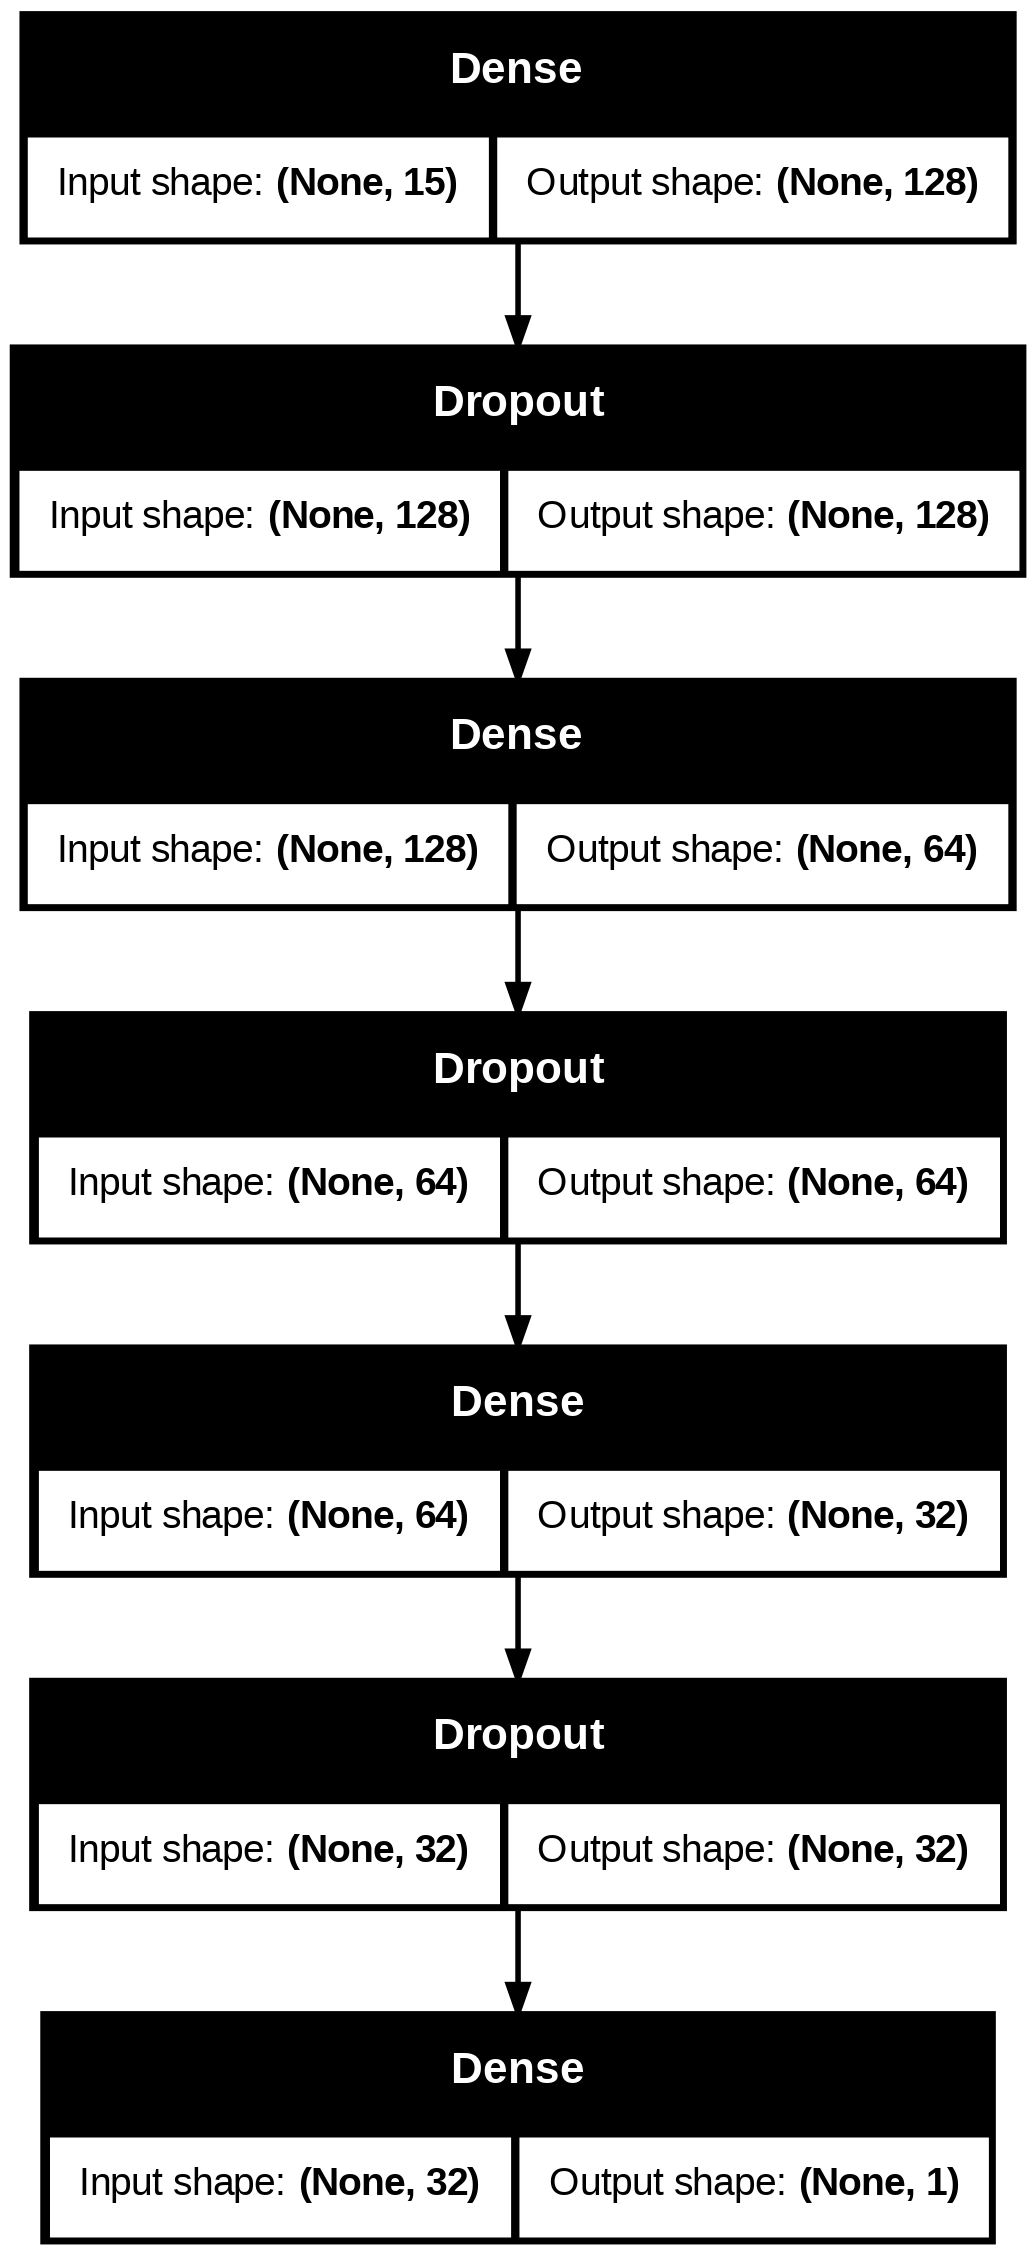

In [36]:
# Plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [37]:
# Train the model with class weights
history = model.fit(
    X_train_final, y_train_resampled, # Use resampled data
    validation_data=(X_test_final, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    class_weight=class_weight_dict # Add class weights here
)

Epoch 1/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step - accuracy: 0.9901 - loss: 0.0779 - val_accuracy: 0.9902 - val_loss: 0.0553
Epoch 2/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 134s 3ms/step - accuracy: 0.9901 - loss: 0.0566 - val_accuracy: 0.9902 - val_loss: 0.0551
Epoch 3/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - accuracy: 0.9900 - loss: 0.0566 - val_accuracy: 0.9902 - val_loss: 0.0552
Epoch 4/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 138s 3ms/step - accuracy: 0.9901 - loss: 0.0560 - val_accuracy: 0.9902 - val_loss: 0.0551
Epoch 5/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.9902 - loss: 0.0555 - val_accuracy: 0.9902 - val_loss: 0.0551
Epoch 6/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accuracy: 0.9902 - loss: 0.0553 - val_accuracy: 0.9902 - val_loss: 0.0551
Epoch 7/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - accuracy: 0.9903 - loss: 0.0548 - val_accuracy: 0.9902 - val_loss: 0.0551
Epoch 8/100
29496/29496 ━━━━━━━━━━━━━━━━━━━━ 97s 3ms/ste

# Evaluation

In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_final, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Loss Model: {loss:.4f}")

Test Accuracy: 0.9902
Loss Model: 0.0551


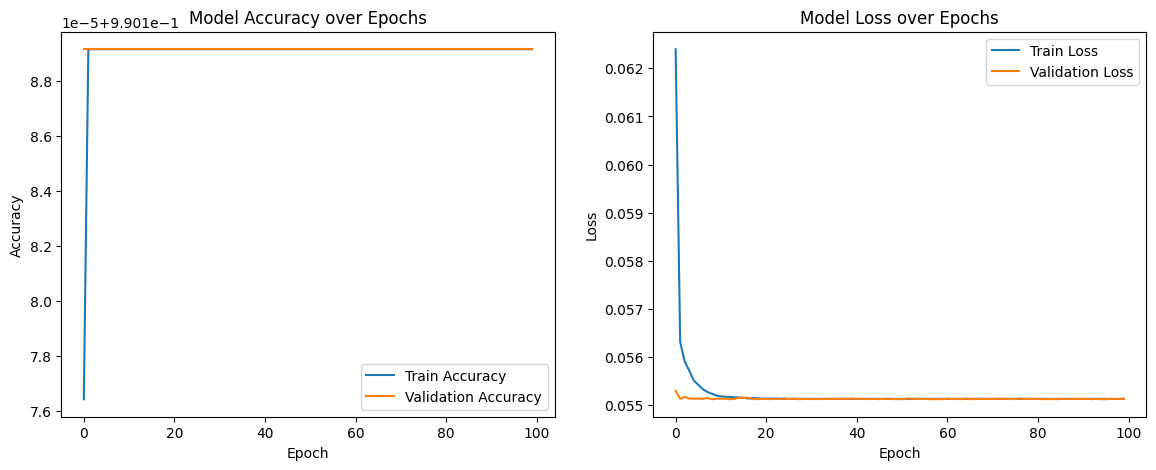

In [39]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

7374/7374 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


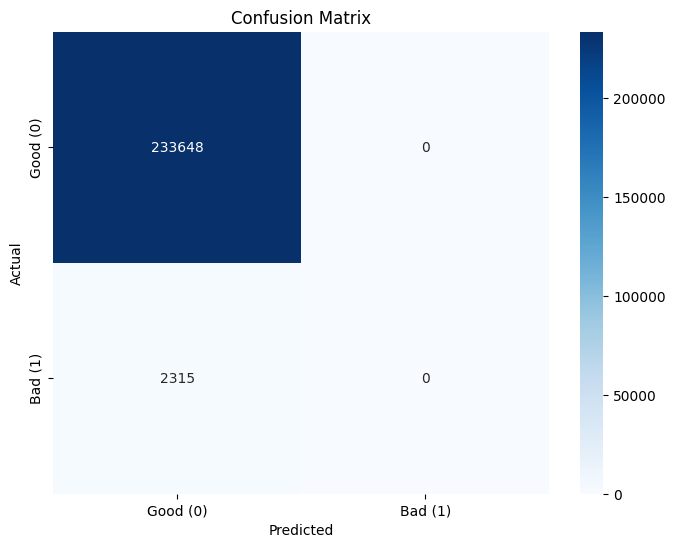

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    233648
           1       0.00      0.00      0.00      2315

    accuracy                           0.99    235963
   macro avg       0.50      0.50      0.50    235963
weighted avg       0.98      0.99      0.99    235963



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Confusion matrix and classification report
y_pred_proba = model.predict(X_test_final)
y_pred = (y_pred_proba > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good (0)', 'Bad (1)'], yticklabels=['Good (0)', 'Bad (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Deployment

## Model Simulation

In [41]:
# Sample input 1 (Good client profile)
sample_input_dict_1 = {
    'CNT_CHILDREN': 0,
    'AMT_INCOME_TOTAL': 500000.0, # Increased income
    'DAYS_EMPLOYED': -1000,
    'FLAG_OWN_CAR': 'Y',
    'FLAG_OWN_REALTY': 'Y',
    'AMT_CREDIT': 1000000.0,
    'AMT_ANNUITY': 50000.0,
    'AMT_GOODS_PRICE': 1000000.0,
    'NAME_INCOME_TYPE': 'Working',
    'NAME_EDUCATION_TYPE': 'Higher education',
    'NAME_FAMILY_STATUS': 'Married',
    'NAME_HOUSING_TYPE': 'House / apartment',
    'DAYS_ID_PUBLISH': -500,
    'OCCUPATION_TYPE': 'Managers', # Changed occupation
    'CNT_FAM_MEMBERS': 2.0,
    'REGION_POPULATION_RELATIVE': 0.02, # Higher population density
    'age': 35.0,
    'DAYS_EMPLOYED_ANOM': 0, # Not unemployed anomalously
    'CODE_GENDER': 'M',
    'credit_history_length': 12.0 # Assume some credit history
}

# Sample input 2 (Potentially Bad client profile)
sample_input_dict_2 = {
    'CNT_CHILDREN': 2,
    'AMT_INCOME_TOTAL': 250000.0, # Lower income
    'DAYS_EMPLOYED': -500,
    'FLAG_OWN_CAR': 'N',
    'FLAG_OWN_REALTY': 'N',
    'AMT_CREDIT': 300000.0,
    'AMT_ANNUITY': 15000.0,
    'AMT_GOODS_PRICE': 300000.0,
    'NAME_INCOME_TYPE': 'Working',
    'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
    'NAME_FAMILY_STATUS': 'Single / not married',
    'NAME_HOUSING_TYPE': 'Rented apartment',
    'DAYS_ID_PUBLISH': -200,
    'OCCUPATION_TYPE': 'Laborers',
    'CNT_FAM_MEMBERS': 3.0,
    'REGION_POPULATION_RELATIVE': 0.008, # Lower population density
    'age': 25.0,
    'DAYS_EMPLOYED_ANOM': 0,
    'CODE_GENDER': 'F',
    'credit_history_length': 3.0 # Shorter credit history
}

In [ ]:
# Convert to DataFrames
sample_input_df_1 = pd.DataFrame([sample_input_dict_1])
sample_input_df_2 = pd.DataFrame([sample_input_dict_2])

In [42]:
# Ensure sample dataframes have the same columns as training data and in the same order
for col in X_train.columns:
    if col not in sample_input_df_1.columns:
        if col in numerical_cols:
            sample_input_df_1[col] = 0
        elif col in categorical_cols_final:
             most_frequent_value = X_train[col].mode()[0]
             sample_input_df_1[col] = most_frequent_value
        else:
            sample_input_df_1[col] = 0

    if col not in sample_input_df_2.columns:
        if col in numerical_cols:
            sample_input_df_2[col] = 0
        elif col in categorical_cols_final:
             most_frequent_value = X_train[col].mode()[0]
             sample_input_df_2[col] = most_frequent_value
        else:
            sample_input_df_2[col] = 0

In [ ]:
# Reorder columns to match the training data
sample_input_df_1 = sample_input_df_1[X_train.columns]
sample_input_df_2 = sample_input_df_2[X_train.columns]

In [43]:
# Encode categorical features in sample dataframes
for col in categorical_cols_final:
    if col in sample_input_df_1.columns and col in label_encoders:
        try:
            sample_input_df_1[col] = label_encoders[col].transform(sample_input_df_1[col])
        except ValueError as e:
             print(f"Warning: Could not encode '{sample_input_df_1[col].iloc[0]}' in column '{col}' for Sample 1. Using default value or imputation.")
             mode_encoded = X_train[col].mode()[0]
             sample_input_df_1[col] = mode_encoded


    if col in sample_input_df_2.columns and col in label_encoders:
        try:
            sample_input_df_2[col] = label_encoders[col].transform(sample_input_df_2[col])
        except ValueError as e:
             print(f"Warning: Could not encode '{sample_input_df_2[col].iloc[0]}' in column '{col}' for Sample 2. Using default value or imputation.")
             mode_encoded = X_train[col].mode()[0]
             sample_input_df_2[col] = mode_encoded

In [44]:
# Scale the sample dataframes
sample_input_scaled_1 = scaler.transform(sample_input_df_1)
sample_input_scaled_2 = scaler.transform(sample_input_df_2)

In [45]:
# Predict
predicted_proba_1 = model.predict(sample_input_scaled_1)[0][0]
predicted_class_1 = (predicted_proba_1 > 0.5).astype("int32")

predicted_proba_2 = model.predict(sample_input_scaled_2)[0][0]
predicted_class_2 = (predicted_proba_2 > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [46]:
# Interpret the predictions - Sample 1
print("Sample 1:")
print(f"Predicted probability of being 'bad' client: {predicted_proba_1:.4f}")
if predicted_class_1 == 1:
    print("The model predicts this applicant is a 'bad' client (high risk).")
else:
    print("The model predicts this applicant is a 'good' client (low risk).")

# Interpret the predictions - Sample 2
print("\nSample 2:")
print(f"Predicted probability of being 'bad' client: {predicted_proba_2:.4f}")
if predicted_class_2 == 1:
    print("The model predicts this applicant is a 'bad' client (high risk).")
else:
    print("The model predicts this applicant is a 'good' client (low risk).")

Sample 1:
Predicted probability of being 'bad' client: 0.0101
The model predicts this applicant is a 'good' client (low risk).

Sample 2:
Predicted probability of being 'bad' client: 0.0101
The model predicts this applicant is a 'good' client (low risk).


## Save Model

In [47]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
try:
    with open('credit_risk_model.tflite', 'wb') as f:
        f.write(tflite_model)
    print("TensorFlow Lite model saved successfully!")
except IOError as e:
    print(f"Error saving TFLite model: {e}")

# Save the preprocessing objects (scaler, label_encoders, and training columns)
try:
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    joblib.dump(X_train.columns.tolist(), 'training_columns.pkl')
    print("Preprocessing objects saved successfully!")
except IOError as e:
    print(f"Error saving preprocessing objects: {e}")

Saved artifact at '/tmp/tmpbc883qnj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 15), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132148962005968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962011344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962007696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962009616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962011728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962010192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962011536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132148962008464: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved successfully!
Preprocessing objects saved successfully!
